
![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftrak.in%2Fwp-content%2Fuploads%2F2017%2F07%2FUPI-logo.jpg&f=1&nofb=1)
# Introduction

Unified Payments Interface (UPI) is a system that powers multiple bank accounts into a single mobile application (of any participating bank), merging several banking features, seamless fund routing & merchant payments into one hood. It also caters to the “Peer to Peer” collect request which can be scheduled and paid as per requirement and convenience.

Looking forward, COVID-19 has provided a new opportunity for UPI and digital banking in general. India wants to decrease the amount of physical currency in circulation, and the pandemic has shown many people the virtues of online banking. For example, young adults wary of infecting their older parents have helped an older generation get on UPI and utilize everything it has to offer.

UPI’s recent boom focuses back to the platform’s original goal: creating an even playing field for all people, regardless of background or socioeconomic status. In 10 or 20 years, it would not be surprising to see all banking conducted virtually. Therefore, it is crucial to create a solid infrastructure that eliminates a system of preferential treatment based on wealth. UPI is helping to fight that fight.

## Goal Of This Kernal
Explore Three Different UPI Companies under different umbrellas like usability, user interface, technical glitches and overall how satisfied the customers are with these apps.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
google_data = pd.read_csv("Datasets/UPI_Payment_Apps_review/GooglePayIndia.csv")
paytm_data = pd.read_csv("Datasets/UPI_Payment_Apps_review/PaytmIndia.csv")
phonepay_data = pd.read_csv("Datasets/UPI_Payment_Apps_review/PhonePayIndia.csv")

## First View Of Data

In [4]:
google_data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,NaN,NaN
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,NaN,NaN
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,NaN,NaN
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,NaN,NaN


In [5]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34228 entries, 0 to 34227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            34228 non-null  int64 
 1   reviewId              34228 non-null  object
 2   userName              34227 non-null  object
 3   userImage             34228 non-null  object
 4   content               34223 non-null  object
 5   score                 34228 non-null  int64 
 6   thumbsUpCount         34228 non-null  int64 
 7   reviewCreatedVersion  29987 non-null  object
 8   at                    34228 non-null  object
 9   replyContent          6112 non-null   object
 10  repliedAt             6112 non-null   object
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


# Feature Engineering
I will divide the Feature Engineering part According to Numeric and Category DataType this will help me to Implement Solutions in a fast and better Way.

## Featching the Numeric Column and finding all the NaN Values in Google dataset

In [6]:
num_category = [feature for feature in google_data.columns if google_data[feature].dtypes != "O"]
google_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

## Featching the Numeric Column and finding all the NaN Values in Paytm dataset

In [7]:
num_category = [feature for feature in paytm_data.columns if paytm_data[feature].dtypes != "O"]
paytm_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

## Featching the Numeric Column and finding all the NaN Values in PhonePay dataset

In [8]:
num_category = [feature for feature in phonepay_data.columns if phonepay_data[feature].dtypes != "O"]
phonepay_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

#### There are no Null Values in Numeric Column in Google, Paytm, PhonePay

## Finding Out The OutLiers In Numeric Column

<AxesSubplot:title={'center':'Checking Outliers in PhonePay thumbsUpCount Column'}, xlabel='thumbsUpCount'>

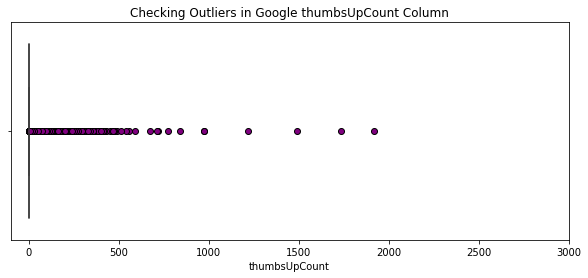

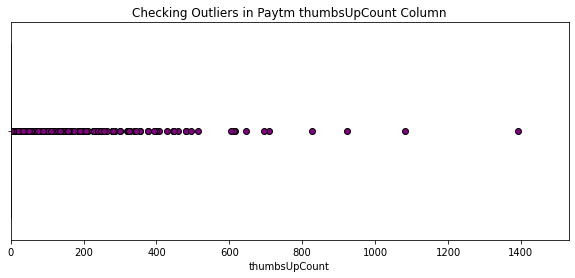

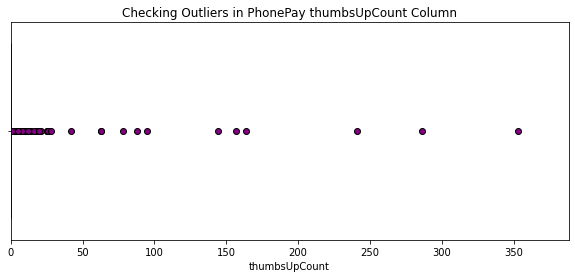

In [9]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
plt.title("Checking Outliers in Google thumbsUpCount Column")
sns.boxplot(x=google_data.thumbsUpCount, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.title("Checking Outliers in Paytm thumbsUpCount Column")
plt.xlim(paytm_data.thumbsUpCount.min(), paytm_data.thumbsUpCount.max()*1.1)
sns.boxplot(x=paytm_data.thumbsUpCount, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.title("Checking Outliers in PhonePay thumbsUpCount Column")
plt.xlim(phonepay_data.thumbsUpCount.min(), phonepay_data.thumbsUpCount.max()*1.1)
sns.boxplot(x=phonepay_data.thumbsUpCount, flierprops=flierprops)

## There were some Outliers So I removed All the Outliers and assigned back the data

In [10]:
google_data = google_data[google_data["thumbsUpCount"] <=500]
paytm_data = paytm_data[paytm_data["thumbsUpCount"] <=550]
phonepay_data = phonepay_data[phonepay_data["thumbsUpCount"] <=100]
google_data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,NaN,NaN
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,NaN,NaN
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,NaN,NaN
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,NaN,NaN


## Featching the Categorical Column and finding all the NaN Values in Google dataset

In [11]:
cat_category = [feature for feature in google_data.columns if google_data[feature].dtypes == "O"]
google_data[cat_category].isnull().sum()

reviewId                    0
userName                    1
userImage                   0
content                     5
reviewCreatedVersion     4241
at                          0
replyContent            28106
repliedAt               28106
dtype: int64

In [12]:
google_data = google_data.drop(columns=["reviewCreatedVersion", "repliedAt"])
google_data["replyContent"] = google_data["replyContent"].fillna("No_reply/No_data")

## Featching the Categorical Column and finding all the NaN Values in Paytm dataset

In [13]:
cat_category = [feature for feature in paytm_data.columns if paytm_data[feature].dtypes == "O"]
paytm_data[cat_category].isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     2
reviewCreatedVersion    23665
at                          0
replyContent            69777
repliedAt               69777
dtype: int64

In [14]:
paytm_data = paytm_data.drop(columns=["reviewCreatedVersion","repliedAt"])
paytm_data["replyContent"] = paytm_data["replyContent"].fillna("No_reply/No_data")

## Featching the Categorical Column and finding all the NaN Values in PhonePay dataset

In [15]:
cat_category = [feature for feature in phonepay_data.columns if phonepay_data[feature].dtypes == "O"]
phonepay_data[cat_category].isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
reviewCreatedVersion    2136
at                         0
replyContent            8803
repliedAt               8803
dtype: int64

In [16]:
phonepay_data = phonepay_data.drop(columns=["reviewCreatedVersion", "repliedAt"])
phonepay_data["replyContent"] = phonepay_data["replyContent"].fillna("No_reply/No_data")

#### In all the 3 Datasets I removed ["reviewCreatedVersion","repliedAt"] as i think this will not be used in future EDA Part. And I Relplace all the NaN Values from replyContent to "No_reply/No_data".

In [17]:
google_data = google_data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)
paytm_data = paytm_data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)
phonepay_data = phonepay_data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)

### I also assined new "upi_company" column to all three datases

In [18]:
google_data["upi_company"] = "Google"
paytm_data["upi_company"] = "paytm"
phonepay_data["upi_company"] = "phonepay"

**Then I Joined all three datasets ["Google", "Paytm", "Phonepay"] to a single dataset called data, But before that, I realized that the distribution of data is not equal for example total rows in the google dataset is 34218 and in phonepay it is 11735 and in Paytm it is 137897. So I will be taking only 11734 rows to form each dataset so I also used the `sample()` function so that I can get 11734 random Data for all three datasets.**  

In [20]:
google_data = google_data.sample(frac=1).reset_index(drop=True)
paytm_data = paytm_data.sample(frac=1).reset_index(drop=True)
phonepay_data = phonepay_data.sample(frac=1).reset_index(drop=True)

data = phonepay_data.append([paytm_data[:11735 ], google_data[:11735]], ignore_index=True)

data = data.rename(columns={"at": "review_created_at"})
data.head()

,content,score,thumbsUpCount,review_created_at,replyContent,upi_company
0,Good,5,0,2021-11-13 10:36:30,No_reply/No_data,phonepay
1,Processing is so slow and not working properly...,1,0,2021-11-11 10:52:28,"Hi Lokendra, we regret the inconvenience cause...",phonepay
2,Wallet service very faults. And problem solvin...,1,0,2021-11-18 12:36:04,"Hi Rohit, this is definitely not the experienc...",phonepay
3,Supper,5,0,2021-11-17 23:18:37,"Thank you for the 5-star rating, Ravi. We're h...",phonepay
4,Good,5,0,2021-11-10 23:30:22,No_reply/No_data,phonepay


In [21]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,content,score,thumbsUpCount,review_created_at,replyContent,upi_company
0,best app i love❤😘 thanx for pyatm kashback,5,0,2021-08-24 12:04:57,Awesome! It's been our pleasure. You can also ...,paytm
1,Very nice👍👏👏,5,0,2021-11-18 05:51:39,Thank you for the amazing 5-star review. We're...,phonepay
2,Good app,5,0,2021-07-31 00:33:28,Awesome! It's been our pleasure. You can also ...,paytm
3,Excellent,5,0,2021-11-11 18:02:12,No_reply/No_data,phonepay
4,Good,5,0,2021-08-05 10:34:44,Awesome! It's been our pleasure. You can also ...,paytm


### "review_created_at" column was in str dtype so I converted it to DateTime format and then I extracted year and month from Datetime Column. And then I arranged the data Accordingly**

In [22]:
data["review_created_at"] = pd.to_datetime(data["review_created_at"])
data["Year"] = data['review_created_at'].dt.year
data["month"] = data['review_created_at'].dt.month
data = data[["upi_company", "Year", "month", "content", "score", "thumbsUpCount", "replyContent"]]
data.head()

,upi_company,Year,month,content,score,thumbsUpCount,replyContent
0,paytm,2021,8,best app i love❤😘 thanx for pyatm kashback,5,0,Awesome! It's been our pleasure. You can also ...
1,phonepay,2021,11,Very nice👍👏👏,5,0,Thank you for the amazing 5-star review. We're...
2,paytm,2021,7,Good app,5,0,Awesome! It's been our pleasure. You can also ...
3,phonepay,2021,11,Excellent,5,0,No_reply/No_data
4,paytm,2021,8,Good,5,0,Awesome! It's been our pleasure. You can also ...


### I took the "score" column and converted it into a discrete rating Bucket using `cut()` function, It helps to understand the rating (scoring) system in a better way.

In [23]:
scores = [0, 1, 2, 3, 4, 5]
scores_name = ["very Negative", "Negative", "Average", "Positive", "Excellent"]
data["score"] = pd.cut(data["score"],scores, labels=scores_name)
data.head()

,upi_company,Year,month,content,score,thumbsUpCount,replyContent
0,paytm,2021,8,best app i love❤😘 thanx for pyatm kashback,Excellent,0,Awesome! It's been our pleasure. You can also ...
1,phonepay,2021,11,Very nice👍👏👏,Excellent,0,Thank you for the amazing 5-star review. We're...
2,paytm,2021,7,Good app,Excellent,0,Awesome! It's been our pleasure. You can also ...
3,phonepay,2021,11,Excellent,Excellent,0,No_reply/No_data
4,paytm,2021,8,Good,Excellent,0,Awesome! It's been our pleasure. You can also ...


In [24]:
backup_data = data.copy()

# EDA

## First i will do eda on each an every company seperately

### EDA On Google

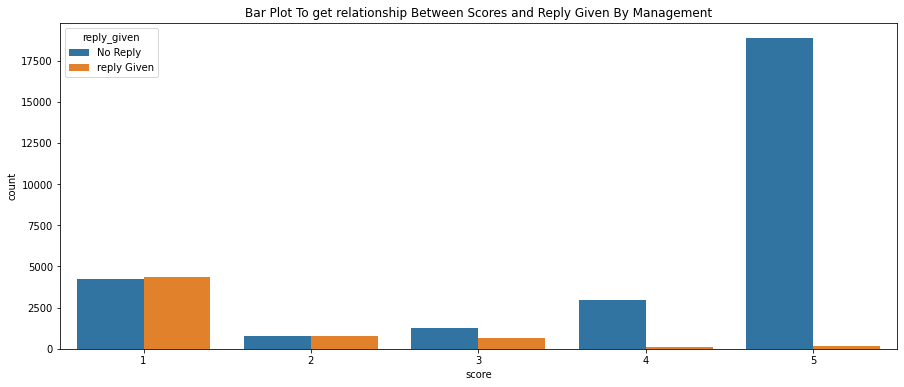

In [25]:
google_data["reply_given"] = google_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=google_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()


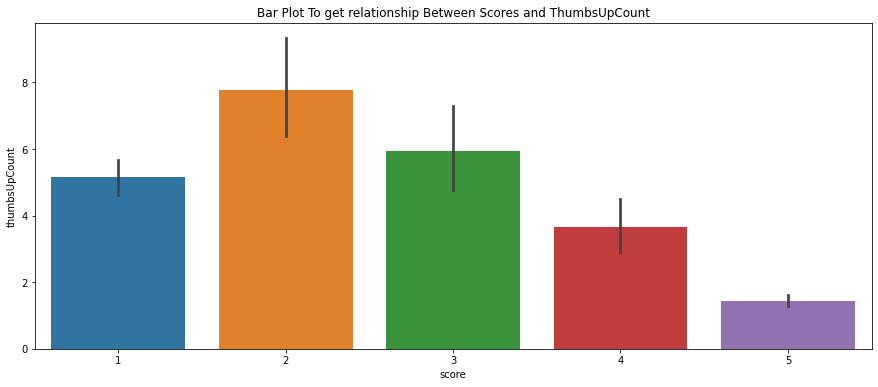

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=google_data)
plt.title('Bar Plot To get relationship Between Scores and ThumbsUpCount')
plt.show()


## EDA On Paytm

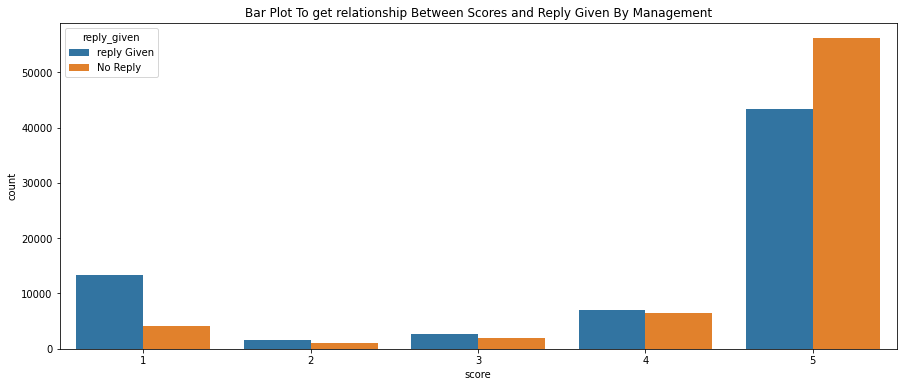

In [27]:
paytm_data["reply_given"] = paytm_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=paytm_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

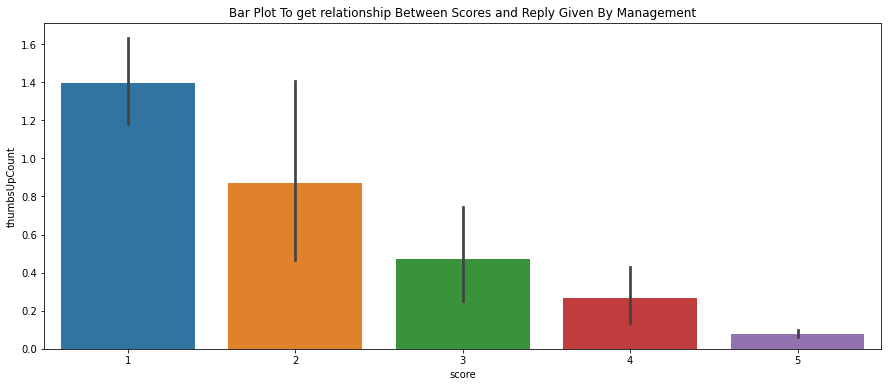

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=paytm_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

## EDA On PhonePay

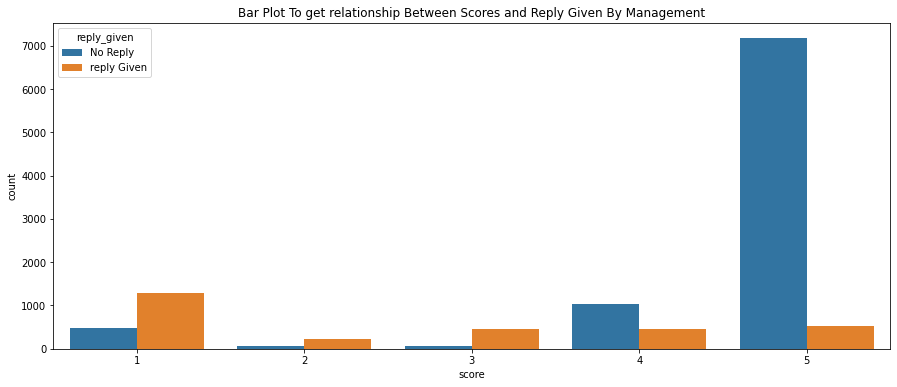

In [29]:
phonepay_data["reply_given"] = phonepay_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=phonepay_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

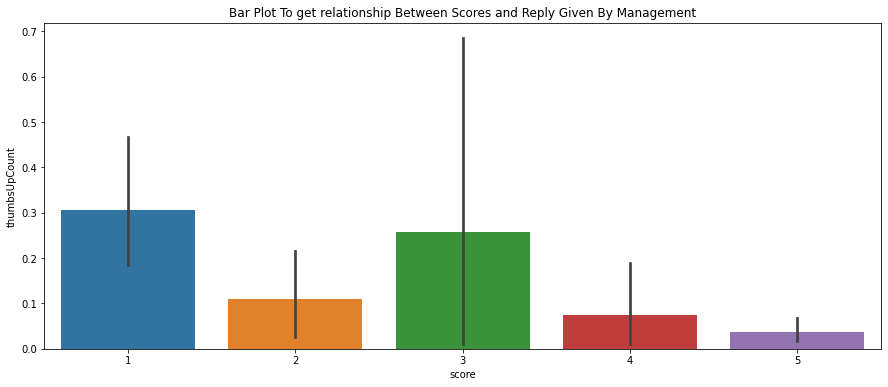

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=phonepay_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

## Duing EDA On all the companies
We have done the EDA on all individual Companies now we will compare all the Companies together and find the best Company.

In [31]:
data.head()

,upi_company,Year,month,content,score,thumbsUpCount,replyContent
0,paytm,2021,8,best app i love❤😘 thanx for pyatm kashback,Excellent,0,Awesome! It's been our pleasure. You can also ...
1,phonepay,2021,11,Very nice👍👏👏,Excellent,0,Thank you for the amazing 5-star review. We're...
2,paytm,2021,7,Good app,Excellent,0,Awesome! It's been our pleasure. You can also ...
3,phonepay,2021,11,Excellent,Excellent,0,No_reply/No_data
4,paytm,2021,8,Good,Excellent,0,Awesome! It's been our pleasure. You can also ...


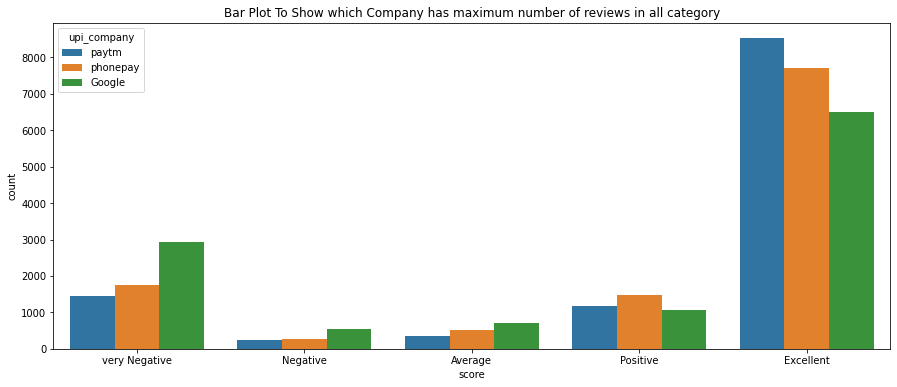

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="upi_company", data=data)
plt.title('Bar Plot To Show which Company has maximum number of reviews in all category')
plt.show()

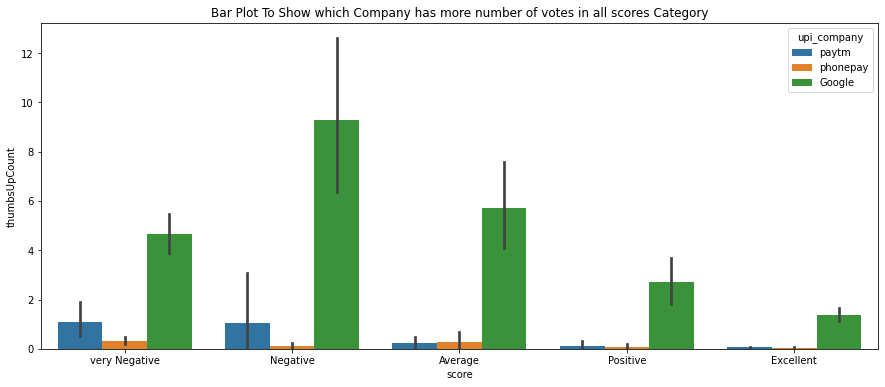

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", hue="upi_company", data=data)
plt.title('Bar Plot To Show which Company has more number of votes in all scores Category')
plt.show()

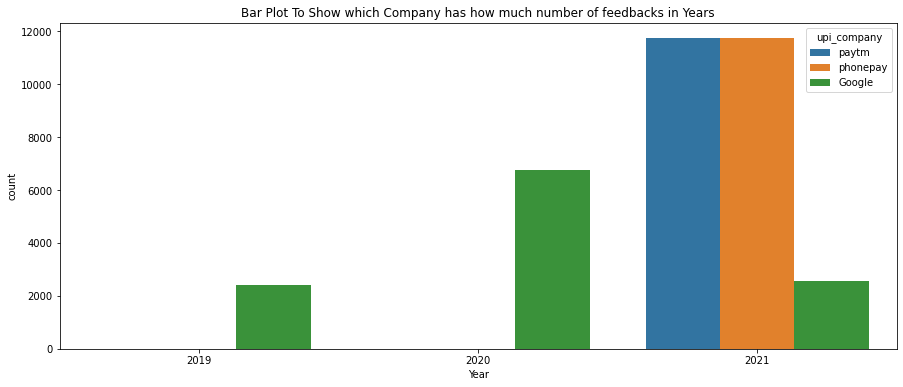

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x="Year", hue="upi_company")
plt.title('Bar Plot To Show which Company has how much number of feedbacks in Years')
plt.show()

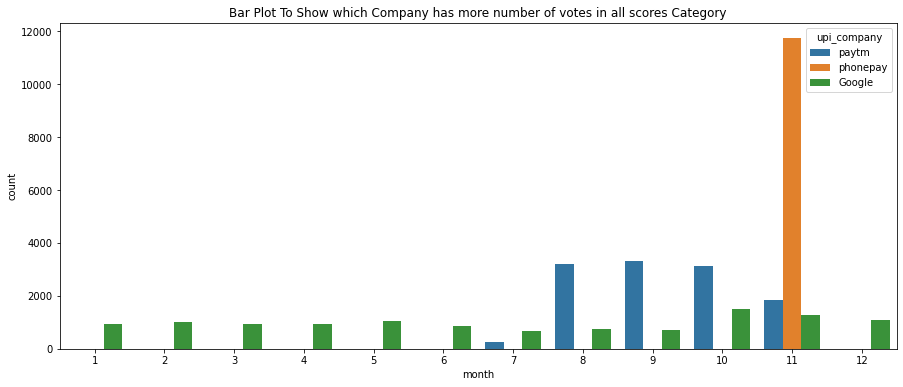

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(data=data, x="month", hue="upi_company")
plt.title('Bar Plot To Show which Company has more number of votes in all scores Category')
plt.show()


## Result Of EDA
I will be resulting in the Data specifically for all Company
then I will compare all the companies together.

#### EDA Result for Google Company:
-  According to the data, Management has replied to that content/feedback which has a bad score rather than replying to that which has a good score. Which is a **great sign** that **Google UPI** is more responsive toward bad experienced Customer.
-  According to the data, The content which has a negative rating has got a **maximum number of votes** which tells that it can possible that the user how gave the votes also in some period of time **faced that same issue**. 

#### EDA Result for Paytm Company:
-  According to the data, Management replied to the content/feedback **ratio** is **balanced** in all the rating(score) categories. This means that Management has given replied not only to the low rating feedback but also to high rating feedback.
- According to the data, The content that has a **negative rating** has got **most Upvotes** and the rating is in **decreasing order** when we move to a more positive rating and the least number of upvotes goes to 5rating feedback.

#### EDA Result for PhonePay Company:
- According to the data, Management replied to the content/feedback ratio **is balanced** in all the rating(score) categories. This means that Management has given replied not only to the low rating feedback but also to high rating feedback. **But** Overall there are much **less number of feedbacks** in negative and average ratings which may be a good sign (not sure) that people are not facing much problem.
- According to the data, Very Negative(0-1) and Average(2-3) reviews have got the largest nymber of Upvotes.

## Overall Review of all Three Companies:
- According to the data, **Paytm** had got the **most excellent(4-5 score) reviews** which means **user** who **use Paytm** are much **happy with their services** than Phonepay and Google. In **Sound number** comes **PhonePay** which is also **not too behind** and at least comes **Google** which needs to **improve its Services**.
- According to the data, the **Most Negative (0-1 scores) rating** goes to **Google** as I said Google has to improve its services to compete with other companies, and the **least** most negative rating goes to **Paytm** which is a good sign. 
- According to the data, **Paytm** and **PhonePay** have got the **largest number of Feedback** compared to Google, **But** I think we cant really on these matrics as we don't have **more data** to **clarify** it.
- According to the data, **Month** wise in  **November** *Phonepay* has the maximum number of feedbacks, **But** again I think we cant really on these matrics as we don't have **more data** to **clarify** it.

### Overall **Paytm** currently provides the **Best Services** in terms of **UPI Payment** as it has the most number of ratings but **Phonepay** is also not much behind with **little more effort Phonepay** can **win** the game but **Google** has to **work harder** to compete with these companies as their **rating** is the **least** when compared to other two. 